# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter
from sklearn.model_selection import train_test_split

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
project_data

Unnamed: 0       id                        teacher_id teacher_prefix  \
0           160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1           140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   
2            21895  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.   
3               45  p246581  f3cb9bffbba169bef1a77b243e620b60           Mrs.   
4           172407  p104768  be1f7507a41f8479dc06f047086a39ec           Mrs.   
5           141660  p154343  a50a390e8327a95b77b9e495b58b9a6e           Mrs.   
6            21147  p099819  9b40170bfa65e399981717ee8731efc3           Mrs.   
7            94142  p092424  5bfd3d12fae3d2fe88684bbac570c9d2            Ms.   
8           112489  p045029  487448f5226005d08d36bdd75f095b31           Mrs.   
9           158561  p001713  140eeac1885c820ad5592a409a3a8994            Ms.   
10           43184  p040307  363788b51d40d978fe276bcb1f8a2b35           Mrs.   
11          127083  p251806  4ba7c721133ef651ca54a03551746708            Ms.   
12           19090  p051126  5e52c92b7e3c472aad247a239d345543           Mrs.   
13           15126  p003874  178f6ae765cd4e0fb143a77c47fd65e2           Mrs.   
14           62232  p233127  424819801de22a60bba7d0f4354d0258            Ms.   
15           67303  p132832  bb6d6d054824fa01576ab38dfa2be160            Ms.   
16          127215  p174627  4ad7e280fddff889e1355cc9f29c3b89           Mrs.   
17          157771  p152491  e39abda057354c979c5b075cffbe5f88            Ms.   
18          122186  p196421  fcd9b003fc1891383f340a89da02a1a6           Mrs.   
19          146331  p058343  8e07a98deb1bc74c75b97521e05b1691            Ms.   
20           75560  p052326  e0c1aad1f71badeff703fadc15f57680           Mrs.   
21          132078  p187097  2d4a4d2d774e5c2fdd25b2ba0e7341f8           Mrs.   
22           84810  p165540  30f08fbe02eba5453c4ce2e857e88eb4            Ms.   
23            8636  p219330  258ef2e6ab5ce007ac6764ce15d261ba            Mr.   
24           21478  p126524  74f8690562c44fc88f65f845b9fe61d0           Mrs.   
25           20142  p009037  b8bf3507cee960d5fedcb27719df2d59           Mrs.   
26           33903  p040091  7a0a5de5ed94e7036946b1ac3eaa99d0            Ms.   
27            1156  p161033  efdc3cf14d136473c9f62becc00d4cec        Teacher   
28           35430  p085706  22c8184c4660f1c589bea061d14b7f35           Mrs.   
29           22088  p032018  45f16a103f1e00b7439861d4e0728a59           Mrs.   
...            ...      ...                               ...            ...   
109218      127181  p077978  91f5c69bf72c82edb9bc1f55596d8d95           Mrs.   
109219       65838  p042022  9a6784108c76576565f46446594f99c4        Teacher   
109220       21062  p064087  19c622a38a0cd76c2e9dbcc40541fabd           Mrs.   
109221       81490  p117254  031e299278ac511616b2950fc1312a55        Teacher   
109222       69138  p152194  6f6e951e435aa9dc966091945414bcc4            Ms.   
109223        5110  p041136  6db62616b4ef6efc2310088f7ea0ae14            Ms.   
109224      109630  p257774  651866d8215616f65934aafcbee21bf5            Ms.   
109225      177841  p079425  c628dff071aa8028b08a5d4972bef2a1           Mrs.   
109226       65359  p085810  1d286ff10ee3982b2b47813f1e415ef2            Ms.   
109227       55643  p146149  e15cd063caa1ce11a45f2179535105f2           Mrs.   
109228      103666  p191845  d0603199630760d8d0eb003108208998           Mrs.   
109229      121219  p055363  523f95270c6aec82bee90e3931ceeeca           Mrs.   
109230      117282  p235512  ee59900af64d9244487e7ed87d0bc423            Ms.   
109231      170085  p248898  9d7a4dae637d1a170778e2db1515e574           Mrs.   
109232       36083  p204774  c116af7435274872bea9ff123a69cf6a           Mrs.   
109233      155847  p120664  b90258ab009b84e0dc11a7186d597141            Ms.   
109234       52918  p057638  dd68d9fbae85933c0173c13f66291cbe            Ms.   
109235       69971  p105083  9636fcacbf65eb393133a94c83c4a0d4           Mrs.   
109236  

In [4]:
resource_data

id                                        description  quantity  \
0        p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1        p069063        Bouncy Bands for Desks (Blue support pipes)         3   
2        p069063  Cory Stories: A Kid's Book About Living With Adhd         1   
3        p069063  Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...         2   
4        p069063  EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...         3   
5        p069063  Last to Finish: A Story About the Smartest Boy...         1   
6        p069063  Mrs. Gorski, I Think I Have the Wiggle Fidgets...         1   
7        p069063  See-N-Read 1503905CQ Reading Tool - Book Size,...         2   
8        p096795  Brewster WPD90218 Wall Pops Flirt Dot, Set of ...         2   
9        p096795  Brewster Wall Pops WPE99065 Peel & Stick Calyp...         2   
10       p096795  TIME For Kids - 3-4 PRINT Bundle - 24 issues /...        40   
11       p149007  Ahora, Spanish, Grades 6 - 12, Level 2 (min. 1...        60   
12       p149007  Scholastic News, Grades 5/6 (min. 10 subscript...        96   
13       p149007  Science Spin Grades 3–6 - 8 Issues / Min. 10 S...        96   
14       p236235     PP440X - Fairy Tales Problem Solving STEM Kits         2   
15       p052460  DD165AT - Calming Colors&#174; Easy-Clean Room...         1   
16       p052460  DD165SB - Calming Colors&#174; Easy-Clean Room...         1   
17       p052460  DD165SE - Calming Colors&#174; Easy-Clean Room...         1   
18       p052460  DD165SG - Calming Colors&#174; Easy-Clean Room...         1   
19       p233680          AA758BU - Connect & Store Book Bin - Blue         4   
20       p233680         AA758GR - Connect & Store Book Bin - Green         4   
21       p233680           AA758RD - Connect & Store Book Bin - Red         4   
22       p233680       AA758RG - Connect & Store Book Bin -  Orange         4   
23       p233680                 AA758VT - Connect & Store Book Bin         5   
24       p233680        AA758YE - Connect & Store Book Bin - Yellow         5   
25       p233680    JJ302 - Books On Wheels Mobile Library - 6 Bins         1   
26       p233680                 LX468BU - Extra Storage Bin - Blue         2   
27       p233680                LX468GR - Extra Storage Bin - Green         2   
28       p233680                  LX468RD - Extra Storage Bin - Red         2   
29       p233680               LX468YE - Extra Storage Bin - Yellow         2   
...          ...                                                ...       ...   
1541242  p187432  Samsung Chromebook, 11.6" Screen, 2 GB RAM, 16...         3   
1541243  p187432                   Sentry Folding Headphones, Black        10   
1541244  p187432                   Sentry Folding Headphones, White         4   
1541245  p149426  Piper Computer Kit | Educational Computer that...         1   
1541246  p238803              CARPET MY FAVORITE COLORS-7FT6INX12FT         1   
1541247  p087783                        BALL STAY N PLACE SAND FILL         2   
1541248  p087783                  BR302BU - Comfy Floor Seat - Blue         1   
1541249  p087783                   BR302RD - Comfy Floor Seat - Red         1   
1541250  p087783                   CARDINAL (PP) - CLASSROOM SELECT         3   
1541251  p087783               CF521GR - Giant Comfy Pillow - Green         1   
1541252  p087783  OPTION CLASS - CS NEOCLASS/NEOMOVE SHELL COLOR...         3   
1541253  p087783  STOOL - CS NEOROK - STOOL HEIGHT 12 - RUBBER B...         3   
1541254  p086116  Apple iPad 2 2nd generation Tablet, 1 GHz proc...         1   
1541255  p086116  Apple iPad with Retina Display MD513LL/A (16GB...        11   
1541256  p086116  ProCase iPad Case 9.7" 2017 - Vintage Folio St...         3   
1541257  p086116  iPad 2 Case, iPad 3 Case, iPad 4 Case, AiSMei ...         7   
1541258  p086116  iPad 9.7 2017 Case (New 2017 Model), EasyAcc U...         2   
1541259  p086116  iPad Mini Case, Apple iPad 

In [5]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [6]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   

      project_subject_categories            project_subject_subcategories  \
55660             Math & Science  Applied Sciences, Health & Life Science   
76127              Special Needs                            Special Needs   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  
55660                                            53                    1  
76127                                             4                    1

In [7]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [8]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [9]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [10]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [11]:
X = project_data
y = project_data['project_is_approved'].values
X_train, X_test, y_train, y_test=train_test_split(project_data, y, test_size=0.33, stratify=y)
#X_train, X_cv, y_train, y_cv=train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

In [12]:
X_train.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
57289       37028  p042436  8ada7c900478454873d2372cb4307518            Ms.   
66230       11213  p150604  ea584d77e637fc880818a54c3d4eb436           Mrs.   

      school_state                Date project_grade_category  \
57289           WI 2016-08-10 12:10:30          Grades PreK-2   
66230           AR 2016-12-29 22:37:29          Grades PreK-2   

                          project_title  \
57289  Most Athletes Start With a Ball!   
66230  Extra, Extra: Read All About It!   

                                         project_essay_1  \
57289  My school is a neighborhood school that has be...   
66230  My school has a high percentage of students on...   

                                         project_essay_2 project_essay_3  \
57289  My students would like to have playground equi...             NaN   
66230  These books will be placed in student book bin...             NaN   

      project_essay_4                           project_resource_summary  \
57289             NaN  My students need basketballs, footballs, jump ...   
66230             NaN  My students need books for their book bins. My...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
57289                                            93                    1   
66230                                             1                    1   

        clean_categories clean_subcategories  \
57289      Health_Sports         Gym_Fitness   
66230  Literacy_Language            Literacy   

                                                   essay  
57289  My school is a neighborhood school that has be...  
66230  My school has a high percentage of students on...

In [13]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [14]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

I have been fortunate enough to use the Fairy Tale STEM kits in my classroom as well as the STEM journals, which my students really enjoyed.  I would love to implement more of the Lakeshore STEM kits in my classroom for the next school year as they provide excellent and engaging STEM lessons.My students come from a variety of backgrounds, including language and socioeconomic status.  Many of them don't have a lot of experience in science and engineering and these kits give me the materials to provide these exciting opportunities for my students.Each month I try to do several science or STEM/STEAM projects.  I would use the kits and robot to help guide my science instruction in engaging and meaningful ways.  I can adapt the kits to my current language arts pacing guide where we already teach some of the material in the kits like tall tales (Paul Bunyan) or Johnny Appleseed.  The following units will be taught in the next school year where I will implement these kits: magnets, motion, si

My classroom consists of twenty-two amazing sixth graders from different cultures and backgrounds. They are a social bunch who enjoy working in partners and working with groups. They are hard-working and eager to head to middle school next year. My job is to get them ready to make this transition and make it as smooth as possible. In order to do this, my students need to come to school every day and feel safe and ready to learn. Because they are getting ready to head to middle school, I give them lots of choice- choice on where to sit and work, the order to complete assignments, choice of projects, etc. Part of the students feeling safe is the ability for them to come into a welcoming, encouraging environment. My room is colorful and the atmosphere is casual. I want them to take ownership of the classroom because we ALL share it together. Because my time with them is limited, I want to ensure they get the most of this time and enjoy it to the best of their abilities.Currently, we have 

In [15]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [16]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

\"A person is a person, no matter how small.\" (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed. \r\nStudents in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.\r\nOur school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the ear

In [17]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

 A person is a person, no matter how small.  (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed.   Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.  Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the early chi

In [18]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

 A person is a person no matter how small Dr Seuss I teach the smallest students with the biggest enthusiasm for learning My students learn in many different ways using all of our senses and multiple intelligences I use a wide range of techniques to help all my students succeed Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures including Native Americans Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom Kindergarteners in my class love to work with hands on materials and have many different opportunities to practice a skill before it is mastered Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum Montana is the perfect place to learn about agriculture and nutrition My students love to role play in our pretend kitchen in the early childhood classroom

In [19]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [20]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays_tr = []
# tqdm is for printing the status bar
for sentance in tqdm(X_train['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_tr.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████████| 73196/73196 [03:13<00:00, 378.79it/s]


In [21]:
# after preprocesing
#preprocessed_essays[20000]
X_train.columns.values

array(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects',
       'project_is_approved', 'clean_categories', 'clean_subcategories',
       'essay'], dtype=object)

In [22]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays_te = []
# tqdm is for printing the status bar
for sentance in X_test['essay'].values:
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_te.append(sent.lower().strip())

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [23]:
# similarly you can preprocess the titles also
from tqdm import tqdm
preprocessed_project_title_tr = []
# tqdm is for printing the status bar
for sentance in X_train['project_title'].values:
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_project_title_tr.append(sent.lower().strip())

In [24]:
from tqdm import tqdm
preprocessed_project_title_te = []
# tqdm is for printing the status bar
for sentance in X_test['project_title'].values:
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_project_title_te.append(sent.lower().strip())

## 1.5 Preparing data for models

In [25]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

## Steps

1. Compute probability of +ve outcomes for each category.
2. for -ve probability use P(+ve)+p(-ve) = 1, and compute its corresponding -ve values.

# clean_subcategories : categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [26]:
sorted_sub_cat_dict_tr = {}
X_train['clean_subcategories'].values
#for word in X_train['clean_subcategories'].values:
    

array(['Gym_Fitness', 'Literacy', 'AppliedSciences Mathematics', ...,
       'Literature_Writing', 'VisualArts',
       'EnvironmentalScience Mathematics'], dtype=object)

In [28]:
for value in X_train['clean_subcategories'].values:
    sorted_sub_cat_dict_tr[ value] = 0
    

In [31]:
count = {}
for value in X_train['clean_subcategories'].values:
    count[ value] = 0


In [32]:
i = 0
for word in X_train['clean_subcategories'].values:
    if y_train[i] == 1:
        sorted_sub_cat_dict_tr[word] = sorted_sub_cat_dict_tr[word] + 1
    count[word] = count[word] + 1
    i = i + 1
        

In [36]:
clean_subcategories_pos = []
len(X_train)
for word in X_train['clean_subcategories'].values: 
    clean_subcategories_pos.append(sorted_sub_cat_dict_tr[word]/count[word])
    

In [38]:
clean_subcategories_neg = []
for i in range (len(clean_subcategories_pos)):
    clean_subcategories_neg.append(1 - clean_subcategories_pos[i])


In [40]:
#clean_subcategories_neg[0] + clean_subcategories_pos[0]
X_train['clean_subcategories_neg'] = clean_subcategories_neg
X_train['clean_subcategories_pos'] = clean_subcategories_pos

In [42]:
clean_subcategories_pos = []
len(X_train)
for word in X_test['clean_subcategories'].values:
    if word in sorted_sub_cat_dict_tr.keys():
        clean_subcategories_pos.append(sorted_sub_cat_dict_tr[word]/count[word])
    else:
        clean_subcategories_pos.append(0)
    

In [43]:
clean_subcategories_neg = []
for i in range (len(clean_subcategories_pos)):
    clean_subcategories_neg.append(1 - clean_subcategories_pos[i])


In [45]:
#clean_subcategories_neg[0] + clean_subcategories_pos[0]
X_test['clean_subcategories_neg'] = clean_subcategories_neg
X_test['clean_subcategories_pos'] = clean_subcategories_pos

In [47]:
#X_train['clean_categories'].values
sorted_sub_cat_dict_tr = {}
for value in X_train['clean_categories'].values:
    sorted_sub_cat_dict_tr[ value] = 0
    

In [48]:
count = {}
for value in X_train['clean_categories'].values:
    count[ value] = 0


In [49]:
i = 0
for word in X_train['clean_categories'].values:
    if y_train[i] == 1:
        sorted_sub_cat_dict_tr[word] = sorted_sub_cat_dict_tr[word] + 1
    count[word] = count[word] + 1
    i = i + 1
        

In [50]:
clean_subcategories_pos = []
len(X_train)
for word in X_train['clean_categories'].values: 
    clean_subcategories_pos.append(sorted_sub_cat_dict_tr[word]/count[word])
    

In [51]:
clean_subcategories_neg = []
for i in range (len(clean_subcategories_pos)):
    clean_subcategories_neg.append(1 - clean_subcategories_pos[i])


In [53]:
#clean_subcategories_neg[0] + clean_subcategories_pos[0]
X_train['clean_categories_neg'] = clean_subcategories_neg
X_train['clean_categories_pos'] = clean_subcategories_pos

In [55]:
clean_subcategories_pos = []
len(X_train)
for word in X_test['clean_categories'].values:
    if word in sorted_sub_cat_dict_tr.keys():
        clean_subcategories_pos.append(sorted_sub_cat_dict_tr[word]/count[word])
    else:
        clean_subcategories_pos.append(0)
    

In [56]:
clean_subcategories_neg = []
for i in range (len(clean_subcategories_pos)):
    clean_subcategories_neg.append(1 - clean_subcategories_pos[i])


In [57]:
#clean_subcategories_neg[0] + clean_subcategories_pos[0]
X_test['clean_categories_neg'] = clean_subcategories_neg
X_test['clean_categories_pos'] = clean_subcategories_pos

In [59]:
#X_train['teacher_prefix'].values
sorted_sub_cat_dict_tr = {}
for value in X_train['teacher_prefix'].values:
    sorted_sub_cat_dict_tr[ value] = 0
    

In [60]:
count = {}
for value in X_train['teacher_prefix'].values:
    count[ value] = 0


In [61]:
i = 0
for word in X_train['teacher_prefix'].values:
    if y_train[i] == 1:
        sorted_sub_cat_dict_tr[word] = sorted_sub_cat_dict_tr[word] + 1
    count[word] = count[word] + 1
    i = i + 1
        

In [62]:
clean_subcategories_pos = []
len(X_train)
for word in X_train['teacher_prefix'].values: 
    clean_subcategories_pos.append(sorted_sub_cat_dict_tr[word]/count[word])
    

In [63]:
clean_subcategories_neg = []
for i in range (len(clean_subcategories_pos)):
    clean_subcategories_neg.append(1 - clean_subcategories_pos[i])


In [65]:
#clean_subcategories_neg[0] + clean_subcategories_pos[0]
X_train['teacher_prefix_neg'] = clean_subcategories_neg
X_train['teacher_prefix_pos'] = clean_subcategories_pos

In [67]:
clean_subcategories_pos = []
len(X_train)
for word in X_test['teacher_prefix'].values:
    if word in sorted_sub_cat_dict_tr.keys():
        clean_subcategories_pos.append(sorted_sub_cat_dict_tr[word]/count[word])
    else:
        clean_subcategories_pos.append(0)
    

In [68]:
clean_subcategories_neg = []
for i in range (len(clean_subcategories_pos)):
    clean_subcategories_neg.append(1 - clean_subcategories_pos[i])


In [69]:
#clean_subcategories_neg[0] + clean_subcategories_pos[0]
X_test['teacher_prefix_neg'] = clean_subcategories_neg
X_test['teacher_prefix_pos'] = clean_subcategories_pos

# project_grade_category :categorical data

In [71]:
#X_train['project_grade_category'].values
sorted_sub_cat_dict_tr = {}
for value in X_train['project_grade_category'].values:
    sorted_sub_cat_dict_tr[ value] = 0
    

In [72]:
count = {}
for value in X_train['project_grade_category'].values:
    count[ value] = 0


In [73]:
i = 0
for word in X_train['project_grade_category'].values:
    if y_train[i] == 1:
        sorted_sub_cat_dict_tr[word] = sorted_sub_cat_dict_tr[word] + 1
    count[word] = count[word] + 1
    i = i + 1
        

In [74]:
clean_subcategories_pos = []
len(X_train)
for word in X_train['project_grade_category'].values: 
    clean_subcategories_pos.append(sorted_sub_cat_dict_tr[word]/count[word])
    

In [75]:
clean_subcategories_neg = []
for i in range (len(clean_subcategories_pos)):
    clean_subcategories_neg.append(1 - clean_subcategories_pos[i])


In [76]:
#clean_subcategories_neg[0] + clean_subcategories_pos[0]
X_train['project_grade_category_neg'] = clean_subcategories_neg
X_train['project_grade_category_pos'] = clean_subcategories_pos

In [78]:
clean_subcategories_pos = []
len(X_train)
for word in X_test['project_grade_category'].values:
    if word in sorted_sub_cat_dict_tr.keys():
        clean_subcategories_pos.append(sorted_sub_cat_dict_tr[word]/count[word])
    else:
        clean_subcategories_pos.append(0)
    

In [79]:
clean_subcategories_neg = []
for i in range (len(clean_subcategories_pos)):
    clean_subcategories_neg.append(1 - clean_subcategories_pos[i])


In [80]:
#clean_subcategories_neg[0] + clean_subcategories_pos[0]
X_test['project_grade_category_neg'] = clean_subcategories_neg
X_test['project_grade_category_pos'] = clean_subcategories_pos

# school_state : categorical data

In [82]:
#X_train['school_state'].values
sorted_sub_cat_dict_tr = {}
for value in X_train['school_state'].values:
    sorted_sub_cat_dict_tr[ value] = 0
    

In [83]:
count = {}
for value in X_train['school_state'].values:
    count[ value] = 0


In [84]:
i = 0
for word in X_test['school_state'].values:
    if y_train[i] == 1:
        sorted_sub_cat_dict_tr[word] = sorted_sub_cat_dict_tr[word] + 1
    count[word] = count[word] + 1
    i = i + 1
        

In [85]:
clean_subcategories_pos = []
len(X_train)
for word in X_train['school_state'].values: 
    clean_subcategories_pos.append(sorted_sub_cat_dict_tr[word]/count[word])
    

In [86]:
clean_subcategories_neg = []
for i in range (len(clean_subcategories_pos)):
    clean_subcategories_neg.append(1 - clean_subcategories_pos[i])


In [87]:
#clean_subcategories_neg[0] + clean_subcategories_pos[0]
X_train['school_state_neg'] = clean_subcategories_neg
X_train['school_state_pos'] = clean_subcategories_pos

In [88]:
X_train.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
57289        37028  p042436  8ada7c900478454873d2372cb4307518            Ms.   
66230        11213  p150604  ea584d77e637fc880818a54c3d4eb436           Mrs.   
32742       115119  p217710  da169c6cc9dcce6224fa254fc0afe1b0           Mrs.   
26614       144596  p018581  54d169bc8e599c8df88e011a24f62a53           Mrs.   
106841      153247  p215484  d624fdbaf4774454b187fd1bbb0db8e5           Mrs.   

       school_state                Date project_grade_category  \
57289            WI 2016-08-10 12:10:30          Grades PreK-2   
66230            AR 2016-12-29 22:37:29          Grades PreK-2   
32742            OH 2016-05-13 13:53:23             Grades 6-8   
26614            SC 2016-08-07 21:27:28          Grades PreK-2   
106841           UT 2017-01-10 12:24:12             Grades 6-8   

                               project_title  \
57289       Most Athletes Start With a Ball!   
66230       Extra, Extra: Read All About It!   
32742                    Visualizing Success   
26614                  Making Word Work Fun!   
106841  New Math Medium for Maximum Results!   

                                          project_essay_1  \
57289   My school is a neighborhood school that has be...   
66230   My school has a high percentage of students on...   
32742   \"Differentiation is simply a teacher attendin...   
26614   We start our day with a morning message and re...   
106841  Math is a complex subject to learn and teach. ...   

                                          project_essay_2        ...         \
57289   My students would like to have playground equi...        ...          
66230   These books will be placed in student book bin...        ...          
32742   My students here are amazing, creative, engagi...        ...          
26614   During a large part of our day, students are b...        ...          
106841  Chromebooks in our classroom will offer extend...        ...          

       clean_subcategories_neg clean_subcategories_pos clean_categories_neg  \
57289                 0.167920                0.832080             0.150888   
66230                 0.116588                0.883412             0.132434   
32742                 0.165866                0.834134             0.182385   
26614                 0.135135                0.864865             0.132434   
106841                0.188715                0.811285             0.182385   

        clean_categories_pos  teacher_prefix_neg teacher_prefix_pos  \
57289               0.849112            0.159187           0.840813   
66230               0.867566            0.143021           0.856979   
32742               0.817615            0.143021           0.856979   
26614               0.867566            0.143021           0.856979   
106841              0.817615            0.143021           0.856979   

       project_grade_category_neg project_grade_category_pos  \
57289                    0.150729                   0.849271   
66230                    0.150729                   0.849271   
32742                    0.158829                   0.841171   
26614                    0.150729                   0.849271   
106841                   0.158829                   0.841171   

        school_state_neg  school_state_pos  
57289           0.143802          0.856198  
66230           0.126801          0.873199  
32742           0.136654          0.863346  
26614           0.162162          0.837838  
106841          0.134276          0.865724  

[5 rows x 28 columns]

In [89]:
clean_subcategories_pos = []
len(X_train)
for word in X_test['school_state'].values:
    if word in sorted_sub_cat_dict_tr.keys():
        clean_subcategories_pos.append(sorted_sub_cat_dict_tr[word]/count[word])
    else:
        clean_subcategories_pos.append(0)
    

In [90]:
clean_subcategories_neg = []
for i in range (len(clean_subcategories_pos)):
    clean_subcategories_neg.append(1 - clean_subcategories_pos[i])


In [91]:
#clean_subcategories_neg[0] + clean_subcategories_pos[0]
X_test['school_state_neg'] = clean_subcategories_neg
X_test['school_state_pos'] = clean_subcategories_pos

In [92]:
X_test.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
17795        7356  p202654  06805bb4a38889a65f01c3be2d95735f           Mrs.   
16967       94380  p094593  39fded5fdfe0ac758a392ad92eeeb4fb            Mr.   
32948       57633  p120367  81c52fc626696024f8ed9129d9c2b081           Mrs.   
52187      110067  p051332  83fb846d5c45aca4d930df483b7ffeec            Ms.   
46590       45148  p000388  78b63938415726a9151667cc4116141e           Mrs.   

      school_state                Date project_grade_category  \
17795           WA 2016-08-17 02:31:26             Grades 3-5   
16967           FL 2017-02-09 22:33:54          Grades PreK-2   
32948           WI 2016-08-16 20:19:53          Grades PreK-2   
52187           OH 2016-10-13 13:15:44            Grades 9-12   
46590           CA 2016-12-02 17:28:29          Grades PreK-2   

                      project_title  \
17795   Bouncing Our Way to Success   
16967  Look At Our Chromebook Nook!   
32948          Can You Hear Me Now?   
52187            Cooks in Training!   
46590    The Time Lords Need iPads!   

                                         project_essay_1  \
17795  My students (Hearing and Deaf), which come int...   
16967  My Kindergarten students are from the most div...   
32948  My students are 5 or 6 years old and just star...   
52187  I teach 8 wonderful students with various disa...   
46590  Many of my students come from a low income bac...   

                                         project_essay_2        ...         \
17795  Stay-N-Play balance balls will help my student...        ...          
16967  The world is moving towards technology at a br...        ...          
32948  The classes in our shool are all geared toward...        ...          
52187  My students recieve individualized education b...        ...          
46590  Many of my students do not have access to tech...        ...          

      clean_subcategories_neg clean_subcategories_pos clean_categories_neg  \
17795                0.131599                0.868401             0.129480   
16967                0.131599                0.868401             0.129480   
32948                0.148148                0.851852             0.150538   
52187                0.250000                0.750000             0.131915   
46590                0.146523                0.853477             0.132434   

       clean_categories_pos  teacher_prefix_neg teacher_prefix_pos  \
17795              0.870520            0.143021           0.856979   
16967              0.870520            0.155993           0.844007   
32948              0.849462            0.143021           0.856979   
52187              0.868085            0.159187           0.840813   
46590              0.867566            0.143021           0.856979   

      project_grade_category_neg project_grade_category_pos  school_state_neg  \
17795                   0.144995                   0.855005          0.135753   
16967                   0.150729                   0.849271          0.155825   
32948                   0.150729                   0.849271          0.143802   
52187                   0.164296                   0.835704          0.136654   
46590                   0.150729                   0.849271          0.143469   

       school_state_pos  
17795          0.864247  
16967          0.844175  
32948          0.856198  
52187          0.863346  
46590          0.856531  

[5 rows x 28 columns]

### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [93]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2),max_features=5000)
vectorizer.fit(preprocessed_essays_tr)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=5000, min_df=10,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [94]:
X_train_essay_bow = vectorizer.transform(preprocessed_essays_tr)
#X_cv_essay_bow = vectorizer.transform(preprocessed_essays_cv)
X_test_essay_bow = vectorizer.transform(preprocessed_essays_te)

In [95]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it

vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2),max_features=5000)
vectorizer.fit(preprocessed_project_title_tr)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=5000, min_df=10,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [96]:
X_train_title_bow = vectorizer.transform(preprocessed_project_title_tr)
#X_cv_title_bow =    vectorizer.transform(preprocessed_project_title_cv)
X_test_title_bow =  vectorizer.transform(preprocessed_project_title_te)

#### 1.5.2.2 TFIDF vectorizer

In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,2),max_features=5000)
vectorizer.fit(preprocessed_essays_tr)


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=5000, min_df=10,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [98]:
X_train_essay_tfidf = vectorizer.transform(preprocessed_essays_tr)
#X_cv_essay_tfidf = vectorizer.transform(preprocessed_essays_cv)
X_test_essay_tfidf = vectorizer.transform(preprocessed_essays_te)

In [99]:
vectorizer.fit(preprocessed_project_title_tr)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=5000, min_df=10,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [100]:
X_train_title_tfidf = vectorizer.transform(preprocessed_project_title_tr)
#X_cv_title_tfidf =    vectorizer.transform(preprocessed_project_title_cv)
X_test_title_tfidf =  vectorizer.transform(preprocessed_project_title_te)

#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [102]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [103]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_tr = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in preprocessed_essays_tr: # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_tr.append(vector)

print(len(avg_w2v_vectors_tr))
print(len(avg_w2v_vectors_tr[0]))

73196
300


In [104]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_te = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in preprocessed_essays_te: # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_te.append(vector)

print(len(avg_w2v_vectors_te))
print(len(avg_w2v_vectors_te[0]))

36052
300


In [105]:
avg_w2v_vectors_preprocessed_project_title_tr = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in preprocessed_project_title_tr: # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_preprocessed_project_title_tr.append(vector)

print(len(avg_w2v_vectors_preprocessed_project_title_tr))
print(len(avg_w2v_vectors_preprocessed_project_title_tr[0]))

73196
300


In [106]:
avg_w2v_vectors_preprocessed_project_title_te = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_project_title_te): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_preprocessed_project_title_te.append(vector)

print(len(avg_w2v_vectors_preprocessed_project_title_te))
print(len(avg_w2v_vectors_preprocessed_project_title_te[0]))

100%|█████████████████████████████████████████████████████████████████████████| 36052/36052 [00:03<00:00, 10250.91it/s]


36052
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [107]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays_tr)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [108]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_tr = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in preprocessed_essays_tr: # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_tr.append(vector)

print(len(tfidf_w2v_vectors_tr))
print(len(tfidf_w2v_vectors_tr[0]))

73196
300


In [109]:
tfidf_w2v_vectors_te = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in preprocessed_essays_te: # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_te.append(vector)

print(len(tfidf_w2v_vectors_te))
print(len(tfidf_w2v_vectors_te[0]))

36052
300


In [110]:
# Similarly you can vectorize for title also
# Similarly you can vectorize for title also
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_project_title_tr)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())


In [111]:

# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_preprocessed_project_title_tr = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_project_title_tr): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_preprocessed_project_title_tr.append(vector)

print(len(tfidf_w2v_vectors_preprocessed_project_title_tr))
print(len(tfidf_w2v_vectors_preprocessed_project_title_tr[0]))

100%|██████████████████████████████████████████████████████████████████████████| 73196/73196 [00:16<00:00, 4384.36it/s]


73196
300


In [112]:

# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_preprocessed_project_title_te = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in preprocessed_project_title_te: # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_preprocessed_project_title_te.append(vector)

print(len(tfidf_w2v_vectors_preprocessed_project_title_te))
print(len(tfidf_w2v_vectors_preprocessed_project_title_te[0]))

36052
300


### 1.5.3 Vectorizing Numerical features

In [113]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
X_train = pd.merge(X_train, price_data, on='id', how='left')

In [114]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(X_train['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized_tr = price_scalar.transform(X_train['price'].values.reshape(-1, 1))

Mean : 297.8090592382097, Standard deviation : 361.8130520969783


In [116]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
X_test = pd.merge(X_test, price_data, on='id', how='left')
price_standardized_test = price_scalar.transform(X_test['price'].values.reshape(-1, 1))

# teacher_number_of_previously_posted_projects : numerical data

In [123]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

teacher_number_of_previously_posted_projects_scalar = StandardScaler()
teacher_number_of_previously_posted_projects_scalar.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {quantity_scalar.mean_[0]}, Standard deviation : {np.sqrt(quantity_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
teacher_number_of_previously_posted_projects_standardized_tr = quantity_scalar.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

C:\Users\Kashif\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



Mean : 17.09383026394885, Standard deviation : 26.606194873200753


C:\Users\Kashif\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



In [124]:
teacher_number_of_previously_posted_projects_standardized_test = quantity_scalar.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

C:\Users\Kashif\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [ ]:
np.array(X_train['clean_subcategories_neg'].values)
#price_standardized_tr
clean_subcategories_neg = []
for ele in X_train['clean_subcategories_neg']:
    clean_subcategories_neg.append([ele])
    
#clean_subcategories_neg


In [141]:
np.concatenate((price_standardized_tr ,X_train['clean_subcategories_neg'].values.reshape(-1,1) ),axis = 1).shape

(73196, 2)

In [142]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X1_tr = np.concatenate(( price_standardized_tr,X_train['clean_subcategories_neg'].values.reshape(-1,1), X_train['clean_subcategories_pos'].values.reshape(-1,1),  X_train['clean_categories_neg'].values.reshape(-1,1), X_train['clean_categories_pos'].values.reshape(-1,1), X_train['teacher_prefix_neg'].values.reshape(-1,1), X_train['teacher_prefix_pos'].values.reshape(-1,1), X_train['project_grade_category_neg'].values.reshape(-1,1),  X_train['project_grade_category_pos'].values.reshape(-1,1), X_train['school_state_neg'].values.reshape(-1,1), X_train['school_state_pos'].values.reshape(-1,1)),axis = 1)
X1_tr.shape

(73196, 11)

In [143]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X1_te = np.concatenate(( price_standardized_test,X_test['clean_subcategories_neg'].values.reshape(-1,1), X_test['clean_subcategories_pos'].values.reshape(-1,1),  X_test['clean_categories_neg'].values.reshape(-1,1), X_test['clean_categories_pos'].values.reshape(-1,1), X_test['teacher_prefix_neg'].values.reshape(-1,1), X_test['teacher_prefix_pos'].values.reshape(-1,1), X_test['project_grade_category_neg'].values.reshape(-1,1),  X_test['project_grade_category_pos'].values.reshape(-1,1), X_test['school_state_neg'].values.reshape(-1,1), X_test['school_state_pos'].values.reshape(-1,1)),axis = 1)
X1_te.shape

(36052, 11)

#  Assignment 9: RF and GBDT

<img src='response.JPG' width=700px>

> The response tabel is built only on train dataset.
> For a category which is not there in train data and present in test data, we will encode them with default values
Ex: in our test data if have State: D then we encode it as [0.5, 0.05]

<ol>
    <li><strong>Apply both Random Forrest and GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters preferably n_estimators, max_depth)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation/simple cross validation data</li>
    <li>use gridsearch cv or randomsearch cv or you can write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='3d_plot.JPG' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='heat_map.JPG' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You can choose either of the plotting techniques: 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
            </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakage, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2.# Assignment 9: RF and GBDT </h1>

### 2.4.1 Applying RF on BOW,<font color='red'> SET 1</font>

In [156]:
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_bow,X_train_title_bow ,X1_tr)).tocsr()
#X_cr = hstack((X_cv_essay_bow,X_cv_title_bow ,X1_cv)).tocsr()
X_te = hstack((X_test_essay_bow,X_test_title_bow ,X1_te)).tocsr()

In [157]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
#print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)


Final Data matrix
(73196, 10011) (73196,)
(36052, 10011) (36052,)


In [158]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

parameters = [{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],'n_estimators':[5, 10, 50, 100, 200, 500]}]
model =  RandomForestClassifier(class_weight = 'balanced')
clf = GridSearchCV(model, parameters, cv=3, scoring='roc_auc',n_jobs=-1)
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

'''plt.plot([10**-4, 10**-2, 10**0, 10**2, 10**4], train_auc, label='Train AUCCUARCY')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between([10**-4, 10**-2, 10**0, 10**2, 10**4],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot([10**-4, 10**-2, 10**0, 10**2, 10**4], cv_auc, label='CV AUCCURACY')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between([10**-4, 10**-2, 10**0, 10**2, 10**4],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter([10**-4, 10**-2, 10**0, 10**2, 10**4], train_auc, label='Train AUC points')
plt.scatter([10**-4, 10**-2, 10**0, 10**2, 10**4], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ACCURACY PLT")
plt.grid()
plt.show()
print(clf.best_estimator_)
print(clf.score(X_tr, y_train))
print(clf.best_params_)'''


'plt.plot([10**-4, 10**-2, 10**0, 10**2, 10**4], train_auc, label=\'Train AUCCUARCY\')\n# this code is copied from here: https://stackoverflow.com/a/48803361/4084039\nplt.gca().fill_between([10**-4, 10**-2, 10**0, 10**2, 10**4],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color=\'darkblue\')\n\nplt.plot([10**-4, 10**-2, 10**0, 10**2, 10**4], cv_auc, label=\'CV AUCCURACY\')\n# this code is copied from here: https://stackoverflow.com/a/48803361/4084039\nplt.gca().fill_between([10**-4, 10**-2, 10**0, 10**2, 10**4],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color=\'darkorange\')\n\nplt.scatter([10**-4, 10**-2, 10**0, 10**2, 10**4], train_auc, label=\'Train AUC points\')\nplt.scatter([10**-4, 10**-2, 10**0, 10**2, 10**4], cv_auc, label=\'CV AUC points\')\n\n\nplt.legend()\nplt.xlabel("Alpha: hyperparameter")\nplt.ylabel("AUC")\nplt.title("ACCURACY PLT")\nplt.grid()\nplt.show()\nprint(clf.best_estimator_)\nprint(clf.score(X_tr, y_train))\nprint(clf.best_params_)'

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)
0.7784040591124053
{'max_depth': 10, 'n_estimators': 500}


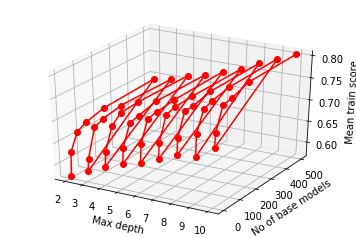

In [159]:
print(clf.best_estimator_)
print(clf.score(X_tr, y_train))
print(clf.best_params_)
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(clf.cv_results_['param_max_depth'].data, clf.cv_results_['param_n_estimators'].data,clf.cv_results_['mean_train_score'],c = 'r',  marker = 'o')
ax.set_xlabel("Max depth")
ax.set_ylabel("No of base models")
ax.set_zlabel("Mean train score")
plt.show()



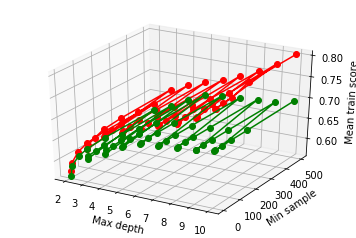

In [160]:
clf.cv_results_['mean_train_score'].sort()
clf.cv_results_['mean_test_score'].sort()
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(clf.cv_results_['param_max_depth'].data, clf.cv_results_['param_n_estimators'].data,clf.cv_results_['mean_train_score'],c = 'r',  marker = 'o')
ax.plot(clf.cv_results_['param_max_depth'].data, clf.cv_results_['param_n_estimators'].data,clf.cv_results_['mean_test_score'],c = 'g',  marker = 'o')
ax.set_xlabel("Max depth")
ax.set_ylabel("Min sample")
ax.set_zlabel("Mean train score")
plt.show()


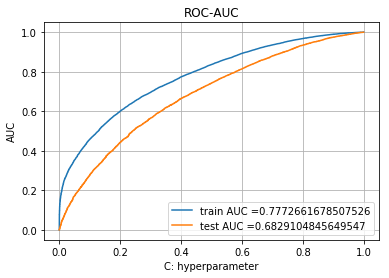

In [161]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

neigh = RandomForestClassifier(max_depth = 10, n_estimators = 500,class_weight = 'balanced')
#neigh.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
#neigh = CalibratedClassifierCV(est, cv=3, method='isotonic')
neigh.fit(X_tr, y_train)
y_train_pred = neigh.predict_proba(X_tr)[:, 1]    
y_test_pred =  neigh.predict_proba(X_te)[:, 1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ROC-AUC")
plt.grid()
plt.show()


1. From above plot its clear that train AUC = .98 which is very high.
2. And test AUC = .68 which is much better than .5 i.e. a random model.

In [162]:
import seaborn as sns
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)),np.argmax(tpr*(1-fpr)), "for threshold",threshould[np.argmax(tpr*(1-fpr))], np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

the maximum value of tpr*(1-fpr) 0.49131960259888996 5594 for threshold 0.4841769038774441 0.484


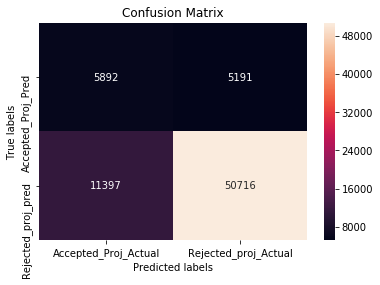

In [163]:
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/19252430
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_train, predict(y_train_pred, te_thresholds, train_fpr, train_tpr)), annot=True, fmt="d", ax = ax)
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Accepted_Proj_Actual', 'Rejected_proj_Actual']); ax.yaxis.set_ticklabels(['Accepted_Proj_Pred', 'Rejected_proj_pred']);

the maximum value of tpr*(1-fpr) 0.40243099837374063 3474 for threshold 0.5062287608210709 0.506


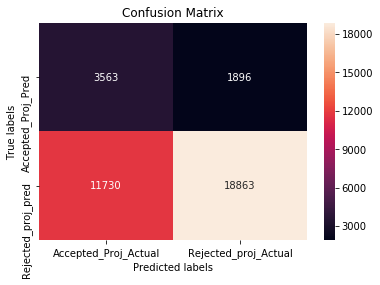

In [164]:
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/19252430
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr)), annot=True, fmt="d", ax = ax)
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Accepted_Proj_Actual', 'Rejected_proj_Actual']); ax.yaxis.set_ticklabels(['Accepted_Proj_Pred', 'Rejected_proj_pred']);

### 2.4.2 Applying DT on TFIDF,<font color='red'> SET 2</font>

In [165]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_tfidf,X_train_title_tfidf ,X1_tr)).tocsr()

X_te = hstack((X_test_essay_tfidf ,X_test_title_tfidf  ,X1_te)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)

print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(73196, 10011) (73196,)
(36052, 10011) (36052,)


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)
0.8016467612861709
{'max_depth': 10, 'n_estimators': 500}


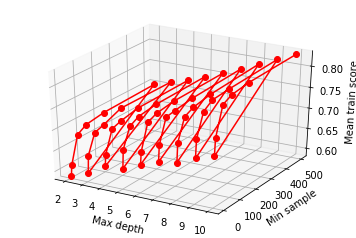

In [166]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

parameters = [{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],'n_estimators':[5, 10, 50, 100, 200, 500]}]
model =  RandomForestClassifier(class_weight = 'balanced')
clf = GridSearchCV(model, parameters, cv=3, scoring='roc_auc',n_jobs=-1)
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']


print(clf.best_estimator_)
print(clf.score(X_tr, y_train))
print(clf.best_params_)
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(clf.cv_results_['param_max_depth'].data, clf.cv_results_['param_n_estimators'].data,clf.cv_results_['mean_train_score'],c = 'r',  marker = 'o')
ax.set_xlabel("Max depth")
ax.set_ylabel("Min sample")
ax.set_zlabel("Mean train score")
plt.show()



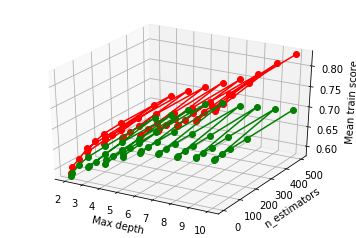

In [167]:
clf.cv_results_['mean_train_score'].sort()
clf.cv_results_['mean_test_score'].sort()
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(clf.cv_results_['param_max_depth'].data, clf.cv_results_['param_n_estimators'].data,clf.cv_results_['mean_train_score'],c = 'r',  marker = 'o')
ax.plot(clf.cv_results_['param_max_depth'].data, clf.cv_results_['param_n_estimators'].data,clf.cv_results_['mean_test_score'],c = 'g',  marker = 'o')
ax.set_xlabel("Max depth")
ax.set_ylabel("n_estimators")
ax.set_zlabel("Mean train score")
plt.show()


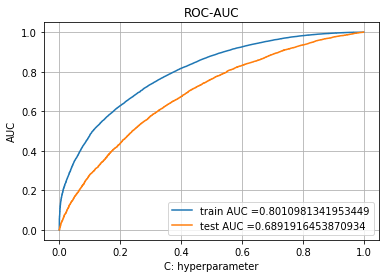

In [168]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.tree import DecisionTreeClassifier
neigh = RandomForestClassifier(max_depth = 10, n_estimators = 500,class_weight = 'balanced')
#neigh.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
#neigh = CalibratedClassifierCV(est, cv=3, method='isotonic')
neigh.fit(X_tr, y_train)
y_train_pred = neigh.predict_proba(X_tr)[:, 1]    
y_test_pred =  neigh.predict_proba(X_te)[:, 1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ROC-AUC")
plt.grid()
plt.show()


1. From above plot its clear that train AUC = .80 which is very high.
2. And test AUC = .69 which is much better than .65 i.e. a random model.

the maximum value of tpr*(1-fpr) 0.5168589683736021 5810 for threshold 0.5019968398609034 0.502


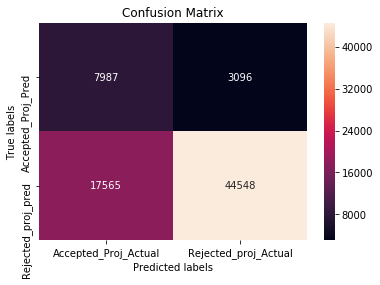

In [169]:
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/19252430
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)), annot=True, fmt="d", ax = ax)
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Accepted_Proj_Actual', 'Rejected_proj_Actual']); ax.yaxis.set_ticklabels(['Accepted_Proj_Pred', 'Rejected_proj_pred']);

the maximum value of tpr*(1-fpr) 0.4088717211912563 3527 for threshold 0.5084014544842932 0.508


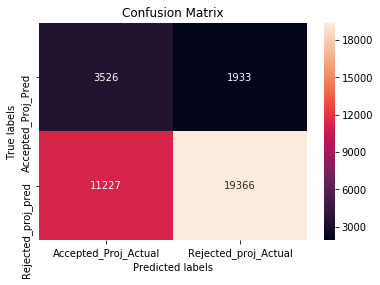

In [170]:
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/19252430
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr)), annot=True, fmt="d", ax = ax)
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Accepted_Proj_Actual', 'Rejected_proj_Actual']); ax.yaxis.set_ticklabels(['Accepted_Proj_Pred', 'Rejected_proj_pred']);

# SET 3

In [171]:
from scipy.sparse import hstack
X_tr = np.concatenate((avg_w2v_vectors_tr,avg_w2v_vectors_preprocessed_project_title_tr ,X1_tr),axis = 1)#.tocsr()
#X_cr = hstack((X_cv_essay_bow,X_cv_title_bow ,X1_cv)).tocsr()
X_te = np.concatenate((avg_w2v_vectors_te,avg_w2v_vectors_preprocessed_project_title_te ,X1_te),axis = 1)#.tocsr()

In [172]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
#print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(73196, 611) (73196,)
(36052, 611) (36052,)


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=9, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)
0.8957127933620542
{'max_depth': 9, 'n_estimators': 500}


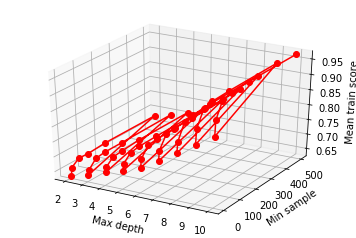

In [173]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier

parameters = [{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],'n_estimators':[5, 10, 50, 100, 200, 500]}]
model =  RandomForestClassifier(class_weight = 'balanced')
clf = GridSearchCV(model, parameters, cv=3, scoring='roc_auc',n_jobs=-1)
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']


print(clf.best_estimator_)
print(clf.score(X_tr, y_train))
print(clf.best_params_)
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(clf.cv_results_['param_max_depth'].data, clf.cv_results_['param_n_estimators'].data,clf.cv_results_['mean_train_score'],c = 'r',  marker = 'o')
ax.set_xlabel("Max depth")
ax.set_ylabel("Min sample")
ax.set_zlabel("Mean train score")
plt.show()



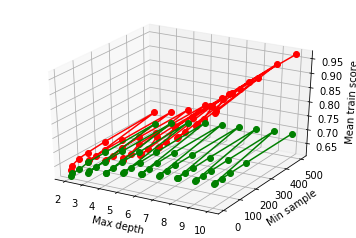

In [174]:
clf.cv_results_['mean_train_score'].sort()
clf.cv_results_['mean_test_score'].sort()
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(clf.cv_results_['param_max_depth'].data, clf.cv_results_['param_n_estimators'].data,clf.cv_results_['mean_train_score'],c = 'r',  marker = 'o')
ax.plot(clf.cv_results_['param_max_depth'].data, clf.cv_results_['param_n_estimators'].data,clf.cv_results_['mean_test_score'],c = 'g',  marker = 'o')
ax.set_xlabel("Max depth")
ax.set_ylabel("Min sample")
ax.set_zlabel("Mean train score")
plt.show()


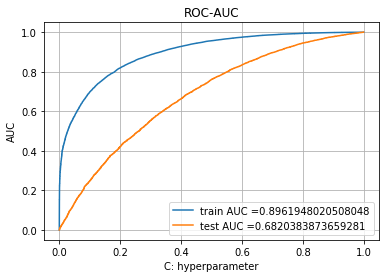

In [175]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.tree import DecisionTreeClassifier
neigh = RandomForestClassifier(max_depth = 9, n_estimators = 500,class_weight = 'balanced')
#neigh.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
#neigh = CalibratedClassifierCV(est, cv=3, method='isotonic')
neigh.fit(X_tr, y_train)
y_train_pred = neigh.predict_proba(X_tr)[:, 1]    
y_test_pred =  neigh.predict_proba(X_te)[:, 1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ROC-AUC")
plt.grid()
plt.show()


1. From above plot its clear that train AUC = .90 which is very high.
2. And test AUC = .69 which is much better than .5 i.e. a random model.

the maximum value of tpr*(1-fpr) 0.6570645382068803 4016 for threshold 0.5185514597515977 0.519


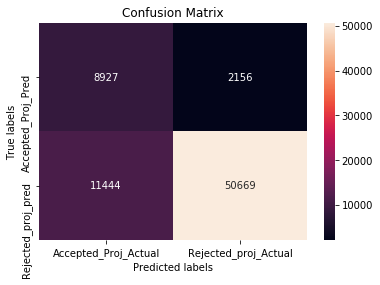

In [176]:
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/19252430
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)), annot=True, fmt="d", ax = ax)
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Accepted_Proj_Actual', 'Rejected_proj_Actual']); ax.yaxis.set_ticklabels(['Accepted_Proj_Pred', 'Rejected_proj_pred']);

the maximum value of tpr*(1-fpr) 0.39958130664161173 3618 for threshold 0.5529244884889509 0.553


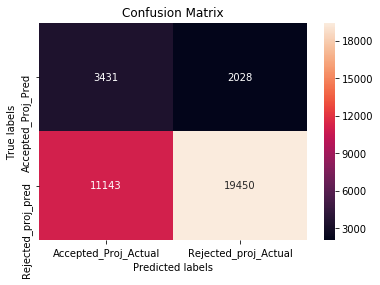

In [177]:
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/19252430
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr)), annot=True, fmt="d", ax = ax)
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Accepted_Proj_Actual', 'Rejected_proj_Actual']); ax.yaxis.set_ticklabels(['Accepted_Proj_Pred', 'Rejected_proj_pred']);

# Task 4

In [178]:
from scipy.sparse import hstack
X_tr = np.concatenate((tfidf_w2v_vectors_tr,tfidf_w2v_vectors_preprocessed_project_title_tr ,X1_tr),axis = 1)#.tocsr()
#X_cr = hstack((X_cv_essay_bow,X_cv_title_bow ,X1_cv)).tocsr()
X_te = np.concatenate((tfidf_w2v_vectors_te,tfidf_w2v_vectors_preprocessed_project_title_te ,X1_te), axis = 1)#.tocsr()

In [179]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
#print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(73196, 611) (73196,)
(36052, 611) (36052,)


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)
0.9258305770937906
{'max_depth': 10, 'n_estimators': 500}


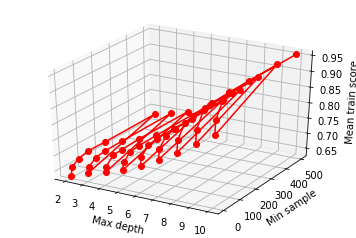

In [180]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier

parameters = [{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],'n_estimators':[5, 10, 50, 100, 200, 500]}]
model =  RandomForestClassifier(class_weight = 'balanced')
clf = GridSearchCV(model, parameters, cv=3, scoring='roc_auc',n_jobs=-1)
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']


print(clf.best_estimator_)
print(clf.score(X_tr, y_train))
print(clf.best_params_)
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(clf.cv_results_['param_max_depth'].data, clf.cv_results_['param_n_estimators'].data,clf.cv_results_['mean_train_score'],c = 'r',  marker = 'o')
ax.set_xlabel("Max depth")
ax.set_ylabel("Min sample")
ax.set_zlabel("Mean train score")
plt.show()



In [181]:
clf.cv_results_['mean_train_score'].sort()
clf.cv_results_['mean_test_score'].sort()

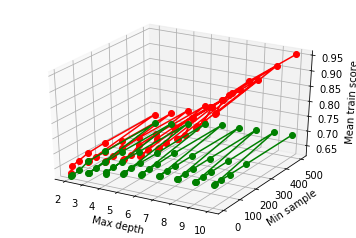

In [182]:
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(clf.cv_results_['param_max_depth'].data, clf.cv_results_['param_n_estimators'].data,clf.cv_results_['mean_train_score'],c = 'r',  marker = 'o')
ax.plot(clf.cv_results_['param_max_depth'].data, clf.cv_results_['param_n_estimators'].data,clf.cv_results_['mean_test_score'],c = 'g',  marker = 'o')
ax.set_xlabel("Max depth")
ax.set_ylabel("Min sample")
ax.set_zlabel("Mean train score")
plt.show()


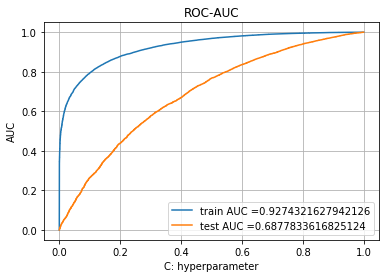

In [183]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

neigh =  RandomForestClassifier(max_depth = 10, n_estimators = 500,class_weight = 'balanced')
#neigh.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
#neigh = CalibratedClassifierCV(est, cv=3, method='isotonic')
neigh.fit(X_tr, y_train)
y_train_pred = neigh.predict_proba(X_tr)[:, 1]    
y_test_pred =  neigh.predict_proba(X_te)[:, 1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ROC-AUC")
plt.grid()
plt.show()


1. From above plot its clear that train AUC = .93 which is very high.
2. And test AUC = .69 which is much better than .5 i.e. a random model.

the maximum value of tpr*(1-fpr) 0.7193871312122889 2694 for threshold 0.5192226359147641 0.519


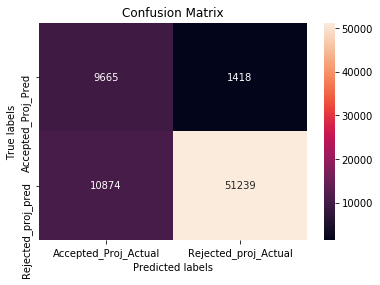

In [184]:
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/19252430
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)), annot=True, fmt="d", ax = ax)
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Accepted_Proj_Actual', 'Rejected_proj_Actual']); ax.yaxis.set_ticklabels(['Accepted_Proj_Pred', 'Rejected_proj_pred']);

the maximum value of tpr*(1-fpr) 0.40873465523372954 3467 for threshold 0.5665228244100398 0.567


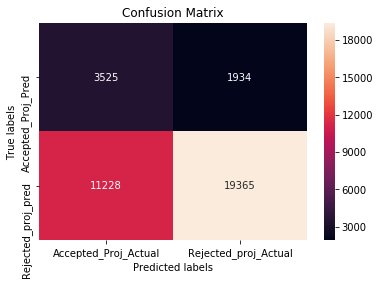

In [185]:
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/19252430
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr)), annot=True, fmt="d", ax = ax)
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Accepted_Proj_Actual', 'Rejected_proj_Actual']); ax.yaxis.set_ticklabels(['Accepted_Proj_Pred', 'Rejected_proj_pred']);

# SET-1 ON GBDT.
### NOTE : LIGHTGBM is used since in my system it took very look time i.e. 24 hrs + for just single iteration of GBDT sklearn and XGBOOST. This was suggested by TEAM APPLIED AI.

In [186]:
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_bow,X_train_title_bow ,X1_tr)).tocsr()
#X_cr = hstack((X_cv_essay_bow,X_cv_title_bow ,X1_cv)).tocsr()
X_te = hstack((X_test_essay_bow,X_test_title_bow ,X1_te)).tocsr()

In [187]:
import lightgbm as lgb
X_train_1, X_cv, y_train_1, y_cv=train_test_split(X_tr, y_train, test_size=0.33, stratify=y_train)
train_score = []
train_score = []
X = []
Y = []
for max_depth in  [2, 3, 4, 5, 6, 7, 8, 9, 10]:
    for n_estimators in [5, 10, 50, 100, 200, 500]:
        X.append(max_depth)
        Y.append(n_estimators)
        model =  lgb.LGBMClassifier(max_depth = max_depth,n_estimators = n_estimators,n_jobs = -1 )
        model.fit(X_train_1, y_train_1)
        #print("TRAIN SCORE for ",max_depth,n_estimators)
        #print(model.score(X_train_1, y_train_1))
        train_score.append(model.score(X_train_1, y_train_1))
        #print("TEST SCORE")
        #print(model.score(X_cv, y_cv))
        train_score.append(model.score(X_cv, y_cv))
        

In [188]:
len(train_score)
train_score[105]
train = []
test = []
for i in range(len(train_score)):
    if i%2 == 0:
        train.append(train_score[i])
        #print(i)
    else:
        test.append(train_score[i])
        
#t(train)

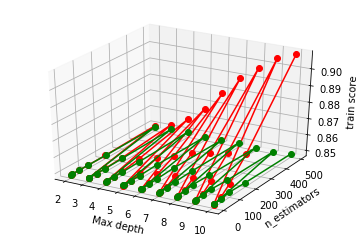

In [189]:
#clf.cv_results_['mean_train_score'].sort()
#clf.cv_results_['mean_test_score'].sort()
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(X, Y,train,c = 'r',  marker = 'o')
ax.plot(X, Y,test,c = 'g',  marker = 'o')
ax.set_xlabel("Max depth")
ax.set_ylabel("n_estimators")
ax.set_zlabel("train score")
plt.show()


In [190]:
index = np.argmax(test)
print("BEST PARAM FOR WHICH TEST SCORE IS MAX:" )
print("Max Depth",X[index],"n_estimators",Y[index],"Test score",test[index])

BEST PARAM FOR WHICH TEST SCORE IS MAX:
Max Depth 4 n_estimators 500 Test score 0.8500517491202649


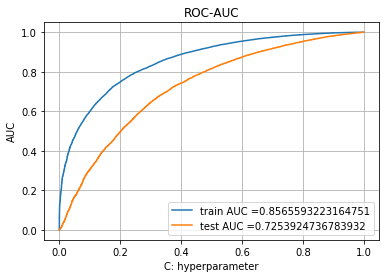

In [191]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

neigh =  lgb.LGBMClassifier(max_depth = 4,n_estimators = 500,n_jobs = -1 )
#neigh.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
#neigh = CalibratedClassifierCV(est, cv=3, method='isotonic')
neigh.fit(X_tr, y_train)
y_train_pred = neigh.predict_proba(X_tr)[:, 1]    
y_test_pred =  neigh.predict_proba(X_te)[:, 1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ROC-AUC")
plt.grid()
plt.show()


the maximum value of tpr*(1-fpr) 0.6004437323057671 4572 for threshold 0.8236742641387033 0.824


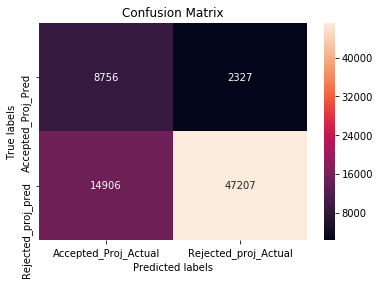

In [192]:
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/19252430
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)), annot=True, fmt="d", ax = ax)
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Accepted_Proj_Actual', 'Rejected_proj_Actual']); ax.yaxis.set_ticklabels(['Accepted_Proj_Pred', 'Rejected_proj_pred']);

the maximum value of tpr*(1-fpr) 0.45548039797832174 3367 for threshold 0.8403274814197975 0.84


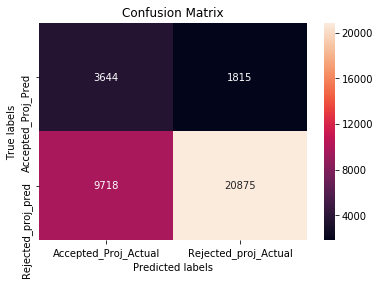

In [193]:
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/19252430
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr)), annot=True, fmt="d", ax = ax)
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Accepted_Proj_Actual', 'Rejected_proj_Actual']); ax.yaxis.set_ticklabels(['Accepted_Proj_Pred', 'Rejected_proj_pred']);

# SET 2

In [194]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_tfidf,X_train_title_tfidf ,X1_tr)).tocsr()

X_te = hstack((X_test_essay_tfidf ,X_test_title_tfidf  ,X1_te)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)

print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(73196, 10011) (73196,)
(36052, 10011) (36052,)


In [195]:
import lightgbm as lgb
#X_train_1, X_cv, y_train_1, y_cv=train_test_split(X_tr, y_train, test_size=0.33, stratify=y_train)
train_score = []
test_score = []
X = []
Y = []
for max_depth in  [2, 3, 4, 5, 6, 7, 8, 9, 10]:
    for n_estimators in [5, 10, 50, 100, 200, 500]:
        X.append(max_depth)
        Y.append(n_estimators)
        model =  lgb.LGBMClassifier(max_depth = max_depth,n_estimators = n_estimators,n_jobs = -1 )
        model.fit(X_train_1, y_train_1)
       # print("TRAIN SCORE for ",max_depth,n_estimators)
       # print(model.score(X_train_1, y_train_1))
        train_score.append(model.score(X_train_1, y_train_1))
       # print("TEST SCORE")
        #print(model.score(X_cv, y_cv))
        test_score.append(model.score(X_cv, y_cv))
        

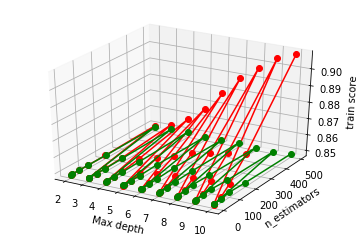

In [198]:
#clf.cv_results_['mean_train_score'].sort()
#clf.cv_results_['mean_test_score'].sort()
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(X, Y,train_score,c = 'r',  marker = 'o')
ax.plot(X, Y,test_score,c = 'g',  marker = 'o')
ax.set_xlabel("Max depth")
ax.set_ylabel("n_estimators")
ax.set_zlabel("train score")
plt.show()


In [199]:
index = np.argmax(test_score)
print("BEST PARAM FOR WHICH TEST SCORE IS MAX:" )
print("Max Depth",X[index],"n_estimators",Y[index],"Test score",test_score[index])

BEST PARAM FOR WHICH TEST SCORE IS MAX:
Max Depth 4 n_estimators 500 Test score 0.8500517491202649


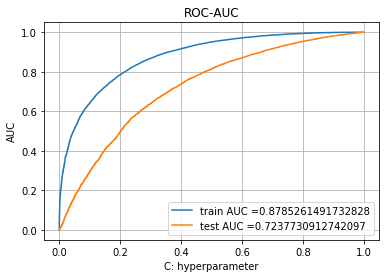

In [200]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

neigh =  lgb.LGBMClassifier(max_depth = 4,n_estimators = 500,n_jobs = -1 )
#neigh.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
#neigh = CalibratedClassifierCV(est, cv=3, method='isotonic')
neigh.fit(X_tr, y_train)
y_train_pred = neigh.predict_proba(X_tr)[:, 1]    
y_test_pred =  neigh.predict_proba(X_te)[:, 1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ROC-AUC")
plt.grid()
plt.show()


the maximum value of tpr*(1-fpr) 0.6284645129880528 4454 for threshold 0.8202580688461325 0.82


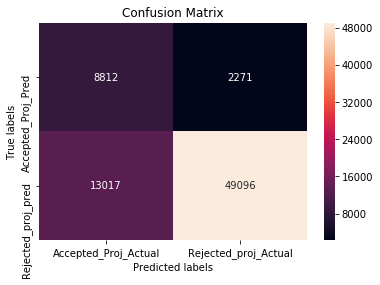

In [201]:
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/19252430
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)), annot=True, fmt="d", ax = ax)
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Accepted_Proj_Actual', 'Rejected_proj_Actual']); ax.yaxis.set_ticklabels(['Accepted_Proj_Pred', 'Rejected_proj_pred']);

the maximum value of tpr*(1-fpr) 0.4511147295714885 3252 for threshold 0.8493065416848512 0.849


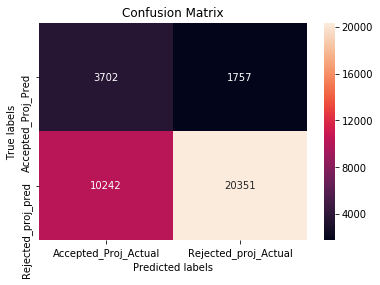

In [202]:
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/19252430
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr)), annot=True, fmt="d", ax = ax)
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Accepted_Proj_Actual', 'Rejected_proj_Actual']); ax.yaxis.set_ticklabels(['Accepted_Proj_Pred', 'Rejected_proj_pred']);

# SET 3

In [203]:
from scipy.sparse import hstack
X_tr = np.concatenate((avg_w2v_vectors_tr,avg_w2v_vectors_preprocessed_project_title_tr ,X1_tr),axis = 1)#.tocsr()
#X_cr = hstack((X_cv_essay_bow,X_cv_title_bow ,X1_cv)).tocsr()
X_te = np.concatenate((avg_w2v_vectors_te,avg_w2v_vectors_preprocessed_project_title_te ,X1_te),axis = 1)#.tocsr()

In [204]:
import lightgbm as lgb
#X_train_1, X_cv, y_train_1, y_cv=train_test_split(X_tr, y_train, test_size=0.33, stratify=y_train)
train_score = []
test_score = []
X = []
Y = []
for max_depth in  [2, 3, 4, 5, 6, 7, 8, 9, 10]:
    for n_estimators in [5, 10, 50, 100, 200, 500]:
        X.append(max_depth)
        Y.append(n_estimators)
        model =  lgb.LGBMClassifier(max_depth = max_depth,n_estimators = n_estimators,n_jobs = -1 )
        model.fit(X_train_1, y_train_1)
        #print("TRAIN SCORE for ",max_depth,n_estimators)
       # print(model.score(X_train_1, y_train_1))
        train_score.append(model.score(X_train_1, y_train_1))
       # print("TEST SCORE")
        #print(model.score(X_cv, y_cv))
        test_score.append(model.score(X_cv, y_cv))
        

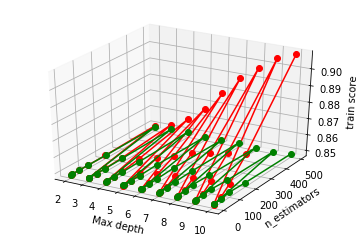

In [205]:
#clf.cv_results_['mean_train_score'].sort()
#clf.cv_results_['mean_test_score'].sort()
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(X, Y,train_score,c = 'r',  marker = 'o')
ax.plot(X, Y,test_score,c = 'g',  marker = 'o')
ax.set_xlabel("Max depth")
ax.set_ylabel("n_estimators")
ax.set_zlabel("train score")
plt.show()


In [206]:
index = np.argmax(test_score)
print("BEST PARAM FOR WHICH TEST SCORE IS MAX:" )
print("Max Depth",X[index],"n_estimators",Y[index],"Test score",test_score[index])

BEST PARAM FOR WHICH TEST SCORE IS MAX:
Max Depth 4 n_estimators 500 Test score 0.8500517491202649


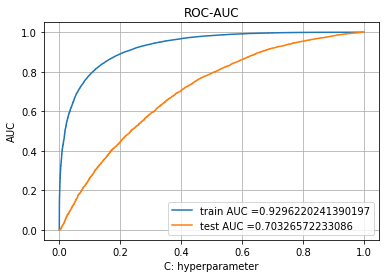

In [207]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

neigh =  lgb.LGBMClassifier(max_depth = 4,n_estimators = 500,n_jobs = -1 )
#neigh.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
#neigh = CalibratedClassifierCV(est, cv=3, method='isotonic')
neigh.fit(X_tr, y_train)
y_train_pred = neigh.predict_proba(X_tr)[:, 1]    
y_test_pred =  neigh.predict_proba(X_te)[:, 1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ROC-AUC")
plt.grid()
plt.show()


the maximum value of tpr*(1-fpr) 0.7220651430383452 3234 for threshold 0.8102902887074274 0.81


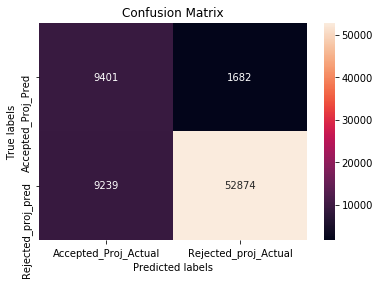

In [208]:
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/19252430
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)), annot=True, fmt="d", ax = ax)
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Accepted_Proj_Actual', 'Rejected_proj_Actual']); ax.yaxis.set_ticklabels(['Accepted_Proj_Pred', 'Rejected_proj_pred']);

the maximum value of tpr*(1-fpr) 0.42592274786353956 3781 for threshold 0.8499513395179037 0.85


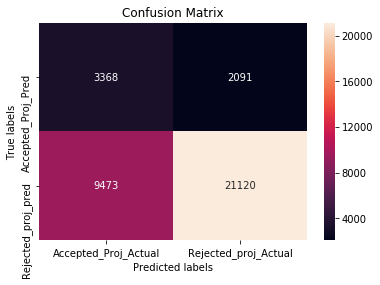

In [209]:
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/19252430
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr)), annot=True, fmt="d", ax = ax)
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Accepted_Proj_Actual', 'Rejected_proj_Actual']); ax.yaxis.set_ticklabels(['Accepted_Proj_Pred', 'Rejected_proj_pred']);

# SET 4

In [210]:
from scipy.sparse import hstack
X_tr = np.concatenate((tfidf_w2v_vectors_tr,tfidf_w2v_vectors_preprocessed_project_title_tr ,X1_tr),axis = 1)#.tocsr()
#X_cr = hstack((X_cv_essay_bow,X_cv_title_bow ,X1_cv)).tocsr()
X_te = np.concatenate((tfidf_w2v_vectors_te,tfidf_w2v_vectors_preprocessed_project_title_te ,X1_te), axis = 1)#.tocsr()

In [212]:
import lightgbm as lgb
#X_train_1, X_cv, y_train_1, y_cv=train_test_split(X_tr, y_train, test_size=0.33, stratify=y_train)
train_score = []
test_score = []
X = []
Y = []
for max_depth in  [2, 3, 4, 5, 6, 7, 8, 9, 10]:
    for n_estimators in [5, 10, 50, 100, 200, 500]:
        X.append(max_depth)
        Y.append(n_estimators)
        model =  lgb.LGBMClassifier(max_depth = max_depth,n_estimators = n_estimators,n_jobs = -1 )
        model.fit(X_train_1, y_train_1)
        #print("TRAIN SCORE for ",max_depth,n_estimators)
        #print(model.score(X_train_1, y_train_1))
        train_score.append(model.score(X_train_1, y_train_1))
        #print("TEST SCORE")
        #print(model.score(X_cv, y_cv))
        test_score.append(model.score(X_cv, y_cv))
        

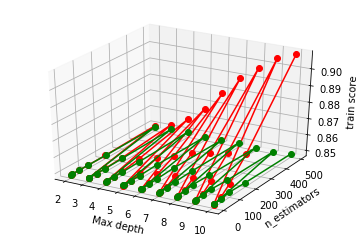

In [213]:
#clf.cv_results_['mean_train_score'].sort()
#clf.cv_results_['mean_test_score'].sort()
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(X, Y,train_score,c = 'r',  marker = 'o')
ax.plot(X, Y,test_score,c = 'g',  marker = 'o')
ax.set_xlabel("Max depth")
ax.set_ylabel("n_estimators")
ax.set_zlabel("train score")
plt.show()


In [214]:
index = np.argmax(test_score)
print("BEST PARAM FOR WHICH TEST SCORE IS MAX:" )
print("Max Depth",X[index],"n_estimators",Y[index],"Test score",test_score[index])

BEST PARAM FOR WHICH TEST SCORE IS MAX:
Max Depth 4 n_estimators 500 Test score 0.8500517491202649


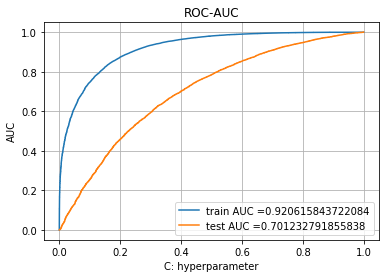

In [215]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

neigh =  lgb.LGBMClassifier(max_depth = 4,n_estimators = 500,n_jobs = -1 )
#neigh.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
#neigh = CalibratedClassifierCV(est, cv=3, method='isotonic')
neigh.fit(X_tr, y_train)
y_train_pred = neigh.predict_proba(X_tr)[:, 1]    
y_test_pred =  neigh.predict_proba(X_te)[:, 1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ROC-AUC")
plt.grid()
plt.show()


the maximum value of tpr*(1-fpr) 0.7030773324932539 3536 for threshold 0.8085537533398732 0.809


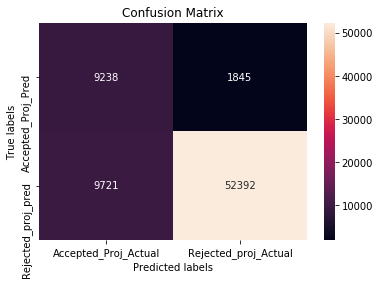

In [216]:
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/19252430
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)), annot=True, fmt="d", ax = ax)
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Accepted_Proj_Actual', 'Rejected_proj_Actual']); ax.yaxis.set_ticklabels(['Accepted_Proj_Pred', 'Rejected_proj_pred']);

the maximum value of tpr*(1-fpr) 0.42592844821702197 3606 for threshold 0.8534884472193044 0.853


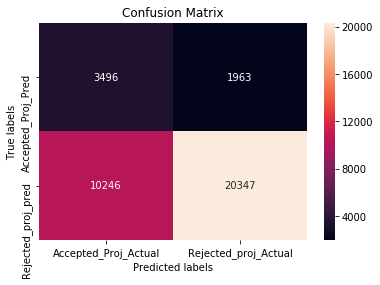

In [217]:
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/19252430
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr)), annot=True, fmt="d", ax = ax)
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Accepted_Proj_Actual', 'Rejected_proj_Actual']); ax.yaxis.set_ticklabels(['Accepted_Proj_Pred', 'Rejected_proj_pred']);

<h1>3. Conclusions</h1>

In [218]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["vectorizer", "Model", "Max_depth ","n_estimators", "AUC"]

x.add_row(["BOW", "RF",10,500, 0.68])
x.add_row(["TFIDF", "RF", 10,500, 0.69])
#x.add_row(["TFIDF 5K Features", "DT", 10,500, 0.65])
x.add_row(["AVG W2V", "RF", 9,500, 0.68])
x.add_row(["TFIDF W2V", "RF", 10,500, 0.69])

x.add_row(["BOW", "GBDT",4,500, 0.73])
x.add_row(["TFIDF", "GBDT", 4,500, 0.72])
#x.add_row(["TFIDF 5K Features", "DT", 10,500, 0.65])
x.add_row(["AVG W2V", "GBDT", 4,500, 0.70])
x.add_row(["TFIDF W2V", "GBDT", 4,500, 0.70])



print(x)

+------------+-------+------------+--------------+------+
| vectorizer | Model | Max_depth  | n_estimators | AUC  |
+------------+-------+------------+--------------+------+
|    BOW     |   RF  |     10     |     500      | 0.68 |
|   TFIDF    |   RF  |     10     |     500      | 0.69 |
|  AVG W2V   |   RF  |     9      |     500      | 0.68 |
| TFIDF W2V  |   RF  |     10     |     500      | 0.69 |
|    BOW     |  GBDT |     4      |     500      | 0.73 |
|   TFIDF    |  GBDT |     4      |     500      | 0.72 |
|  AVG W2V   |  GBDT |     4      |     500      | 0.7  |
| TFIDF W2V  |  GBDT |     4      |     500      | 0.7  |
+------------+-------+------------+--------------+------+
